In [4]:
""" 하우징 데이터 정리 """
import pandas as pd

df = pd.read_csv('../dataset/housing.data', sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
             'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

X = df.iloc[:, :-1].values
y = df['MEDV'].values

In [6]:
""" 다변량 회귀모델 훈련 """
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
slr = LinearRegression()
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

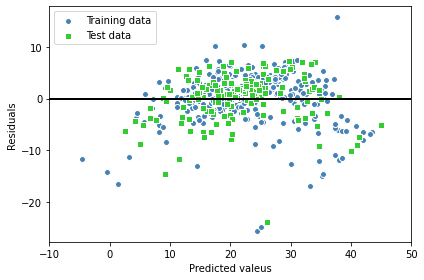

In [7]:
""" 잔차 그래프 그리기 """
import matplotlib.pyplot as plt

plt.scatter(y_train_pred, y_train_pred - y_train,
           c = 'steelblue', marker = 'o', edgecolor = 'white',
           label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c = 'limegreen', marker = 's', edgecolor = 'white',
           label = 'Test data')
plt.xlabel('Predicted valeus')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black', linewidth = 2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

In [8]:
""" 평균 제곱 오차, MSE """
from sklearn.metrics import mean_squared_error

print('훈련 MSE : %.3f, 테스트 MSE : %.3f' % (
    mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

훈련 MSE : 22.390, 테스트 MSE : 21.382


In [10]:
""" 결정계수 """
from sklearn.metrics import r2_score

print('훈련 R2 : %.3f, 테스트 R2 : %.3f' % (
    r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

훈련 R2 : 0.741, 테스트 R2 : 0.728
